# Independent t-test

Dataset on the environmental impact (measured in kilograms of carbon dioxide)

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from math import sqrt

In [24]:
data = pd.read_csv('data3.csv')

*  perform an independent t-test in Python.

In [35]:
stats.ttest_ind(data.value[data.names == 'beef'],data.value[data.names == 'pork'])

Ttest_indResult(statistic=2.377436425293168, pvalue=0.02075151260957248)

The t-value is 2.37 and the p-value is 0.02

<b>Confidence Intervals</b>:<br>
If we have one sample group of data, we can check if the sample is representative of the standard population. To do so, we have to know the proportion $p$ of the characteristic in the standard population.

* Calculating the mean [95% confidence interval] difference between two independent groups. <br>
The first thing to do is calculate the mean difference between the two groups

In [11]:
mean_beef = data.value[data.names == 'beef'].mean()
mean_pork = data.value[data.names == 'pork'].mean()
diff_mean = mean_beef - mean_pork
diff_mean

91.56666666666666

* The next thing we need to do is calculate the 95% confidence interval of this difference.  To do that, we will calculate what is known as the margin of error or MoE.
* consider the t component, which is based on the degrees of freedom associated with our data 
* Because our data comes from 30 beef and 30 pork, our df = 58 (i.e., 30 + 30 -2)

In [39]:
N1 = 30
N2 = 30
df = (N1 + N2 - 2)

td=stats.t(df) # frozen pdf

std1 = data.value[data.names == 'beef'].std()
std2 = data.value[data.names == 'pork'].std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

MoE = td.ppf(0.975)*std_N1N2 * sqrt(1/N1 + 1/N2) # using t-distribution


print('The difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The difference between groups is 91.6 [14.5 to 168.7] (mean [95% CI])


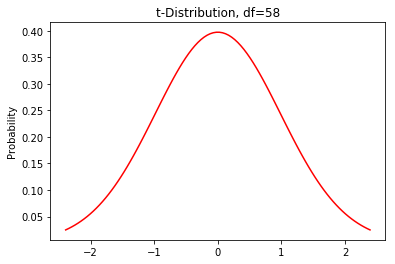

In [43]:
plt.figure()

# display the probability density function (``pdf``):
x = np.linspace(td.ppf(0.01), td.ppf(0.99), 100) # Percent point function
plt.plot(x, td.pdf(x), 'r')
plt.title('t-Distribution, df=58')
plt.ylabel('Probability')
plt.show()